In [166]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as ticker
import matplotlib.lines as mlines
import numpy as np
%matplotlib inline

In [167]:
def addFrequency(p, middle_freq, size, color, style=None, low=None, high=None, alpha=1.0, special=False):
    x = -5
    width = 15
    
    y = 0
    height = 0
    
    
    if middle_freq is None:
        y = low
        height = high - low
    else:
        y = middle_freq - (size / 2)
        height = size
    
    if not special: 
        p.add_patch(patches.Rectangle((x,y), width, height, hatch=style, edgecolor=None, facecolor=color, alpha=alpha))
    if special:
        p.add_patch(patches.Rectangle((x,y), width, height, hatch=style, edgecolor=color, facecolor=None, fill=False, alpha=alpha))

[]

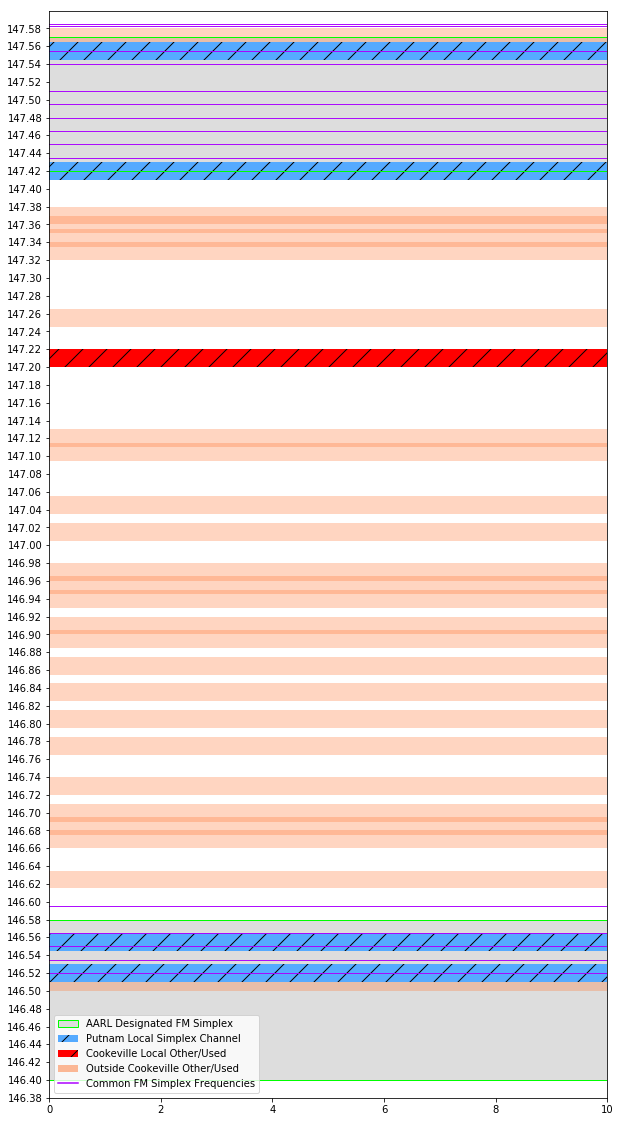

In [170]:
# set up things
fig = plt.figure(figsize=(10,20))
p = fig.add_subplot(1,1,1)

# list frequencies
allowed = [(146.40,146.58), (147.42,147.57)]
local_simplex = [146.520,146.555,147.420,147.555]
local_used = [147.210,145.11,145.430]
near_used = [146.685,145.490,146.910,146.510,145.470,146.805,146.865,146.895,147.255,147.345,147.570,145.525,145.580,147.370,145.230,145.190,146.730,146.835,146.970,146.700,145.170,147.105,147.015,146.670,147.045,145.470,146.955,146.625,145.310,147.120,147.330,146.775,146.940,147.360]
common_simplex = [146.52,146.535,146.55,146.565,146.58,146.595,147.42,147.435,147.45,147.465,147.48,147.495,147.51,147.5825,147.54,147.555,147.57,147.585]



# render frequencies
for freq_range in allowed:
    addFrequency(p, None, None, "#DDDDDD", "", low=freq_range[0], high=freq_range[1])
for freq in local_used:
    addFrequency(p, freq, .02, "#FF0000", "/")
for freq in near_used:
    addFrequency(p, freq, .02, "#FF7733", alpha=.3)
for freq in local_simplex:
    addFrequency(p, freq, .02, "#55AAFF", "/")
for freq in common_simplex:
    addFrequency(p, freq, 0, "#AA00FF", "", alpha=.95, special=True)
for freq_range in allowed:
    addFrequency(p, None, None, "#00FF00", "", low=freq_range[0], high=freq_range[1], special=True)



# set up legend
leg_allowed = patches.Patch(facecolor='#DDDDDD', edgecolor="#00FF00", label='AARL Designated FM Simplex')
leg_local_simples = patches.Patch(facecolor='#55AAFF', hatch="/", label='Putnam Local Simplex Channel')
leg_local_used = patches.Patch(facecolor='#FF0000', hatch="/", label='Cookeville Local Other/Used')
leg_near_used = patches.Patch(facecolor='#FF7733', alpha=.5, label='Outside Cookeville Other/Used')
leg_common = mlines.Line2D([], [], color='#AA00FF', label='Common FM Simplex Frequencies')
p.legend(handles=[leg_allowed, leg_local_simples, leg_local_used, leg_near_used, leg_common])

# settings and display plot
p.set_ylim([146.38,147.6])
p.set_xlim([0,10])
start, end = p.get_ylim()
p.yaxis.set_ticks(np.arange(start, end, .02))

p.plot()